In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sys
import os
import scipy.io
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from scipy.spatial.distance import pdist

In [20]:
path = os.path.join(os.path.split(os.path.realpath('__file__'))[0])
sys.path.append(path)
path

'/content'

In [ ]:
mat = []
dirname = "/content/drive/My Drive/学习/学习资料/Semester 3/GR5243--applied data science/project3/train_set/points"
for f in sorted(os.listdir("/content/drive/My Drive/学习/学习资料/Semester 3/GR5243--applied data science/project3/train_set/points")):
    mat.append(scipy.io.loadmat(os.path.join(dirname,f)))

label_file = pd.read_csv("/content/drive/My Drive/学习/学习资料/Semester 3/GR5243--applied data science/project3/train_set/label.csv")

In [ ]:
pattern = re.compile(r'face*')
coords = [x[list(filter(pattern.match, x.keys()))[0]] for x in mat]

In [ ]:
feature_mat = np.array([pdist(x) for x in coords])
reduced_feature_mat = PCA(n_components=500).fit_transform(feature_mat)
label = np.asarray(label_file.loc[:, 'emotion_idx'])
#dataset = np.concatenate((feature_mat, label[:,np.newaxis]), axis=1)

In [ ]:
# KNN

In [29]:
x = list(range(10,51,10))
y = []
for k in range(10,51,10):
    cvs = cross_validate(KNeighborsClassifier(k), feature_mat, label, cv=5, scoring='accuracy')
    print('run for k={}, '.format(k),'with accuracy {}'.format(cvs['test_score']))
    y.append(np.mean(cvs['test_score']))

run for k=10,  with accuracy [0.27559055 0.28656126 0.27254509 0.20766129 0.19144603]
run for k=20,  with accuracy [0.3011811  0.31027668 0.26853707 0.20967742 0.19959267]
run for k=30,  with accuracy [0.29330709 0.31225296 0.2745491  0.23185484 0.20773931]
run for k=40,  with accuracy [0.28149606 0.32411067 0.28456914 0.23790323 0.24032587]
run for k=50,  with accuracy [0.30905512 0.29644269 0.27655311 0.22177419 0.20977597]


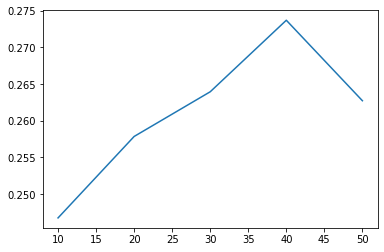

In [30]:
plt.plot(x, y)

In [ ]:
# Random Forest

In [27]:
x = list(range(10,51,10))
y = []
for k in range(10,51,10):
    cvs = cross_validate(RandomForestClassifier(k), feature_mat, label, cv=5, scoring='accuracy')
    print('run for k={}, '.format(k),'with accuracy {}'.format(cvs['test_score']))
    y.append(np.mean(cvs['test_score']))

run for k=10,  with accuracy [0.36614173 0.39525692 0.35671343 0.21169355 0.20773931]
run for k=20,  with accuracy [0.40944882 0.40711462 0.36472946 0.23790323 0.25458248]
run for k=30,  with accuracy [0.41535433 0.45454545 0.39478958 0.29032258 0.24236253]
run for k=40,  with accuracy [0.41338583 0.46442688 0.39078156 0.28024194 0.27494908]
run for k=50,  with accuracy [0.44291339 0.44268775 0.40480962 0.27620968 0.29735234]


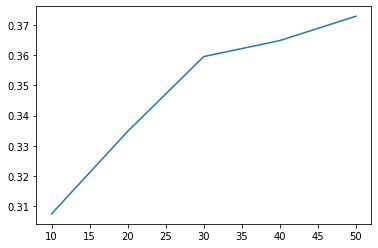

In [28]:
plt.plot(x, y)

In [ ]:
# GBM

In [ ]:
x = list(range(40,101,10))
y_gbm = []
for k in range(40,110,10):
    cvs = cross_validate(GradientBoostingClassifier(n_estimators=k,validation_fraction=0.2,
                                               n_iter_no_change=5, tol=0.01), feature_mat, label, cv=3, scoring='accuracy')
    print('run for n_estimators={}, '.format(k),'with accuracy {}'.format(cvs['test_score']))
    y_gbm.append(np.mean(cvs['test_score']))

In [ ]:
x = list(range(40,101,10))
n40=[0.36741974,0.36614646,0.18765133]
n50=[0.36385256,0.34453782,0.19491525]
n60=[0.40071344,0.36854742,0.2094431]
n70=[0.38168847,0.36734694,0.21186441]
n80=[0.38168847,0.37454982,0.19854722]
n90=[0.40071344,0.35054022,0.21912833]
n100=[0.40665874,0.35894358,0.18644068]
y=[np.mean(n40),np.mean(n50),np.mean(n60),np.mean(n70),np.mean(n80),np.mean(n90),np.mean(n100)]
plt.plot(x,y)

In [ ]:
np.mean(n60)

In [13]:
x = list(range(10,51,10))
y_gbm = []
for k in range(60,130,10):
    cvs = cross_validate(GradientBoostingClassifier(n_estimators=k,validation_fraction=0.2,
                                               n_iter_no_change=5, tol=0.01), feature_mat, label, cv=3, scoring='accuracy')
    print('run for n_estimators={}, '.format(k),'with accuracy {}'.format(cvs['test_score']))
    y_gbm.append(np.mean(cvs['test_score']))

run for n_estimators=80,  with accuracy [0.38168847 0.37454982 0.19854722]
run for n_estimators=90,  with accuracy [0.40071344 0.35054022 0.21912833]
run for n_estimators=100,  with accuracy [0.40665874 0.35894358 0.18644068]


In [ ]:
x = list(range(60,101,10))
y_gbm = []
for k in range(60,130,10):
    cvs = cross_validate(GradientBoostingClassifier(n_estimators=k,validation_fraction=0.2,
                                               n_iter_no_change=5, tol=0.01), feature_mat, label, cv=3, scoring='accuracy')
    print('run for n_estimators={}, '.format(k),'with accuracy {}'.format(cvs['test_score']))
    y_gbm.append(np.mean(cvs['test_score']))

run for n_estimators=60,  with accuracy [0.40071344 0.36854742 0.2094431 ]
run for n_estimators=70,  with accuracy [0.38168847 0.36734694 0.21186441]


In [32]:
x = list(range(10,51,10))
y_gbm = []
for k in range(40,60,10):
    cvs = cross_validate(GradientBoostingClassifier(n_estimators=k,validation_fraction=0.2,
                                               n_iter_no_change=5, tol=0.01), feature_mat, label, cv=3, scoring='accuracy')
    print('run for n_estimators={}, '.format(k),'with accuracy {}'.format(cvs['test_score']))
    y_gbm.append(np.mean(cvs['test_score']))

run for n_estimators=40,  with accuracy [0.36741974 0.36614646 0.18765133]
run for n_estimators=50,  with accuracy [0.36385256 0.34453782 0.19491525]


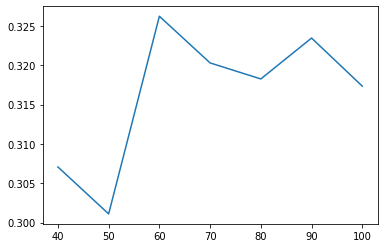

In [33]:
x = list(range(40,101,10))
n40=[0.36741974,0.36614646,0.18765133]
n50=[0.36385256,0.34453782,0.19491525]
n60=[0.40071344,0.36854742,0.2094431]
n70=[0.38168847,0.36734694,0.21186441]
n80=[0.38168847,0.37454982,0.19854722]
n90=[0.40071344,0.35054022,0.21912833]
n100=[0.40665874,0.35894358,0.18644068]
y=[np.mean(n40),np.mean(n50),np.mean(n60),np.mean(n70),np.mean(n80),np.mean(n90),np.mean(n100)]
plt.plot(x,y)

In [34]:
np.mean(n60)

0.3262346533333333